# Task 3: Loan default and expected loss study

You have now moved to a new team assisting the retail banking arm, which has been experiencing higher-than-expected default rates on personal loans. Loans are an important source of revenue for banks, but they are also associated with the risk that borrowers may default on their loans. A default occurs when a borrower stops making the required payments on a debt.

The risk team has begun to look at the existing book of loans to see if more defaults should be expected in the future and, if so, what the expected loss will be. They have collected data on customers and now want to build a predictive model that can estimate the probability of default based on customer characteristics. A better estimate of the number of customers defaulting on their loan obligations will allow us to set aside sufficient capital to absorb that loss. They have decided to work with you in the QR team to help predict the possible losses due to the loans that would potentially default in the next year.

Charlie, an associate in the risk team, who has been introducing you to the business area, sends you a small sample of their loan book and asks if you can try building a prototype predictive model, which she can then test and incorporate into their loss allowances.

The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.
You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
count_no_default = len(df[df['default']==0])
count_default = len(df[df['default']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("Percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("Percentage of default", pct_of_default*100)

Percentage of no default is 81.49
Percentage of default 18.509999999999998


In [4]:
df.groupby('default').mean()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
default,,,,,,,
0,4.967005e+06,0.744140,4092.629025,6322.164549,69883.889804,4.765247,646.938765
1,5.007914e+06,4.618044,4454.854897,19270.582961,70726.740140,3.617504,596.257699


In [5]:
fields = df.columns.values[1:-1]

In [6]:
fields

array(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score'],
      dtype=object)

In [7]:
X = df[fields]
y = df['default']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.99


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2685   15]
 [  30  570]]


In [11]:
print(' The result is telling us that we have: ',(confusion_matrix[0,0]+confusion_matrix[1,1]),'correct predictions')
print(' The result is telling us that we have: ',(confusion_matrix[0,1]+confusion_matrix[1,0]),'incorrect predictions')
print(' We have a total predictions of: ',(confusion_matrix.sum()))

 The result is telling us that we have:  3255 correct predictions
 The result is telling us that we have:  45 incorrect predictions
 We have a total predictions of:  3300


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2700
           1       0.97      0.95      0.96       600

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300



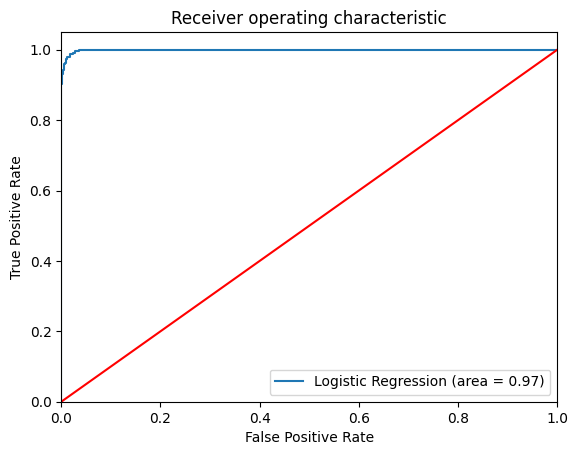

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [14]:
df['PD'] = logreg.predict_proba(df[X_train.columns])[:,1]
df[['customer_id', 'PD']].sample(10)

,customer_id,PD
775,4273778,1.410541e-05
1748,7546945,9.805863e-08
5058,8274243,1.011854e-07
5733,1955951,8.979640e-13
3746,3291461,9.995335e-01
8116,4884976,8.877709e-07
6832,8318043,7.533656e-07
3929,7713751,5.670624e-02
9049,2201112,9.999998e-01
8210,5191252,1.644159e-09


In [15]:
X_train.columns

Index(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score'],
      dtype='object')

In [16]:

def get_probability_of_default(credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score):
    
    new_data = np.array([credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score]).reshape(1, -1)
    new_pred=logreg.predict_proba(new_data)[:,1][0]
    print("This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting on a new debt")
    
    